(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

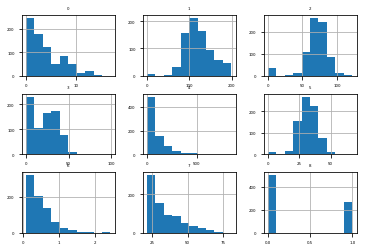

In [2]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [3]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

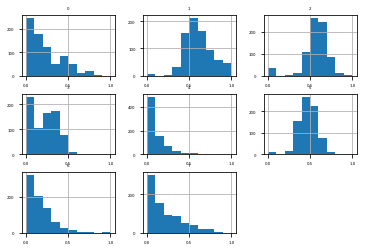

In [4]:
# visualize a minmax scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [5]:
# evaluate knn on the diabetes dataset with minmax scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.739 (0.053)


                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   2.544261e-17  3.614007e-18 -1.327244e-17  7.994184e-17 -3.556183e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.295979e-16  2.398978e-16  1.857600e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

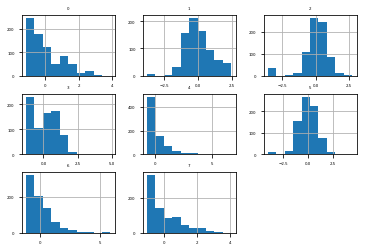

In [6]:
# visualize a standard scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [7]:
# evaluate knn on the diabetes dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

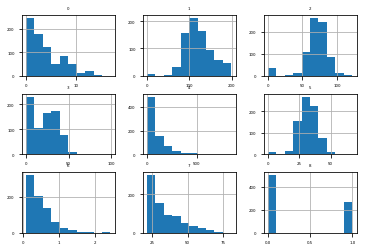

In [8]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [9]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

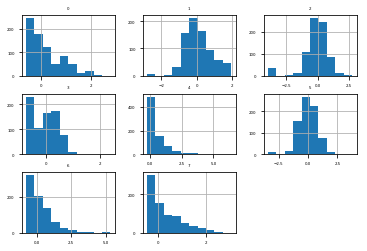

In [11]:
# visualize a robust scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [10]:
# evaluate knn on the diabetes dataset with robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = RobustScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


>1 0.075 (0.032)
>5 0.071 (0.023)
>10 0.066 (0.028)
>15 0.064 (0.026)
>20 0.072 (0.029)
>25 0.074 (0.030)
>30 0.075 (0.025)


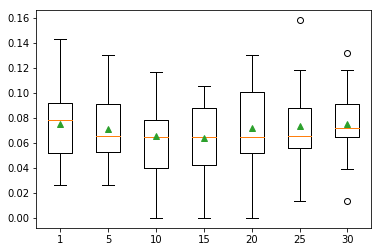

In [17]:
# explore the scaling range of the robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
# get the dataset
def get_dataset():
    # load dataset
    dataset = read_csv('pima-indians-diabetes.csv')
                       # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y
# get a list of models to evaluate
def get_models():
    models = dict()
    for value in [1, 5, 10, 15, 20, 25, 30]:
        # define the pipeline
        trans = RobustScaler(quantile_range=(value, 100-value))
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()